## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [16]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [17]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.1,0.25,0.5]

In [18]:
results = {}
for drop in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with drop_out = %.6f" % (drop))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drop_out-%s" % str(drop)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with drop_out = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)

50000/50000 [==============================] - 15s 291us/step - loss: 1.1441 - acc: 0.5864 - val_loss: 1.3338 - val_acc: 0.5307
Epoch 48/50
50000/50000 [==============================] - 15s 290us/step - loss: 1.1362 - acc: 0.5892 - val_loss: 1.3196 - val_acc: 0.5367
Epoch 49/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.1409 - acc: 0.5871 - val_loss: 1.3356 - val_acc: 0.5334
Epoch 50/50
50000/50000 [==============================] - 17s 347us/step - loss: 1.1364 - acc: 0.5915 - val_loss: 1.3448 - val_acc: 0.5248
Experiment with drop_out = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout) 

50000/50000 [==============================] - 15s 310us/step - loss: 1.5146 - acc: 0.4581 - val_loss: 1.4506 - val_acc: 0.4868
Epoch 46/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.5056 - acc: 0.4589 - val_loss: 1.4821 - val_acc: 0.4725
Epoch 47/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5069 - acc: 0.4574 - val_loss: 1.4637 - val_acc: 0.4842
Epoch 48/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5098 - acc: 0.4566 - val_loss: 1.4680 - val_acc: 0.4799
Epoch 49/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.5057 - acc: 0.4594 - val_loss: 1.4737 - val_acc: 0.4789
Epoch 50/50
50000/50000 [==============================] - 15s 291us/step - loss: 1.5003 - acc: 0.4605 - val_loss: 1.4944 - val_acc: 0.4724
Experiment with drop_out = 0.500000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inpu

50000/50000 [==============================] - 15s 291us/step - loss: 1.9062 - acc: 0.2863 - val_loss: 1.9701 - val_acc: 0.3019
Epoch 44/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.9058 - acc: 0.2878 - val_loss: 1.9566 - val_acc: 0.2983
Epoch 45/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.9046 - acc: 0.2896 - val_loss: 1.9589 - val_acc: 0.2963
Epoch 46/50
50000/50000 [==============================] - 14s 287us/step - loss: 1.9025 - acc: 0.2902 - val_loss: 1.9411 - val_acc: 0.3028
Epoch 47/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.9026 - acc: 0.2865 - val_loss: 1.9843 - val_acc: 0.2783
Epoch 48/50
50000/50000 [==============================] - 14s 290us/step - loss: 1.9020 - acc: 0.2864 - val_loss: 1.9357 - val_acc: 0.3047
Epoch 49/50
50000/50000 [==============================] - 14s 289us/step - loss: 1.9015 - acc: 0.2909 - val_loss: 1.8868 - val_acc: 0.3288
Epoch 50/50
50000/50000 [=======

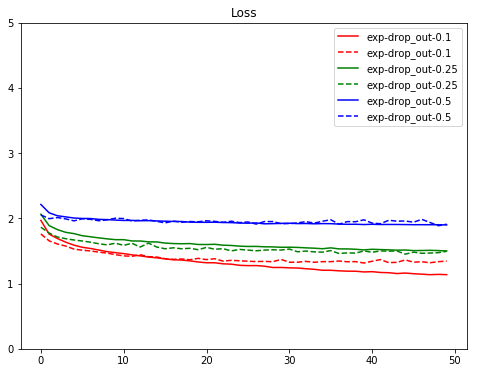

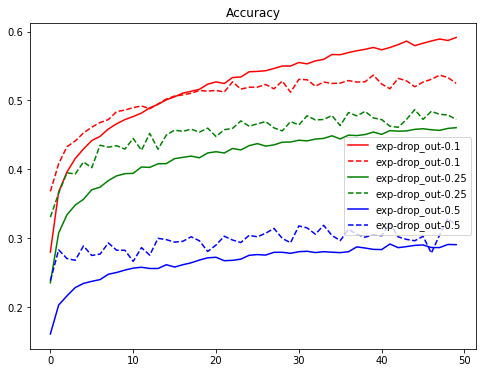

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()